In [23]:
import xml.etree.ElementTree as ET
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

In [4]:
tree = ET.parse('TEST-ch.epfl.dias.cs422.QueryTest.xml')
print(tree)

In [31]:
root = tree.getroot()[1:-2]

In [114]:
for child in root[:10]:
    print(child.tag, child.attrib)

testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():1', 'time': '2.236'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():1', 'time': '0.069'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():2', 'time': '0.032'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():3', 'time': '0.033'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():4', 'time': '0.164'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():5', 'time': '0.072'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():6', 'time': '0.027'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():7', 'time': '0.019'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():8', 'time': '0.014'}
testcase {'classname': 'ch.epfl.dias.cs422.QueryTest', 'name': 'tests():9', 'time': '0.013'}


In [35]:
tests = ["volcano (row store)", "operator-at-a-time (row store)","block-at-a-time (row store)", 
"late-operator-at-a-time (row store)","volcano (column store)",
"operator-at-a-time (column store)",
"block-at-a-time (column store)",
"late-operator-at-a-time (column store)", 
"volcano (pax store)", "operator-at-a-time (pax store)",
"block-at-a-time (pax store)",
"late-operator-at-a-time (pax store)" ]

In [36]:
groups = zip(*[iter(root)]*3)

In [37]:
data = {}
for idx,test in enumerate(tests):
    data[test] = root[45*idx: (idx + 1)*45]

In [118]:
print(data[tests[0]][0].attrib['time'])
bars = {}
limit = 12
count = 0
for k,v in data.items():
    if count < limit:
        tmp = []
        for stat in v:
            tmp.append(float(stat.attrib['time']))
        bars[k] = tmp
        count += 1


2.236


In [140]:
block = "block-at-a-time"
volcano = "volcano"
operator = "operator-at-a-time"
late ="late"
models = [block, volcano, operator, late]


In [149]:
def byModel(bars, start=0, end=45):

    groupedByModel = {}
    for m in models:
        groupedByModel[m] = {}
    for name, times in bars.items():
        for model in models:
            if name.startswith(model):
                groupedByModel[model][name] = times[start:end]
    return groupedByModel

In [150]:
tcph = byModel(bars, 35, 45)
micro = byModel(bars,1,35)

In [192]:
def plot(bars, n):
    ind = np.arange(n)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    #p1 = plt.bar(ind, menMeans, width, yerr=menStd)
    #p2 = plt.bar(ind, womenMeans, width,
                 #bottom=menMeans, yerr=womenStd)
    ps = []
    r=ind
    for name, times in bars.items():
        print(len(r), len(times))
        ps.append(plt.bar(r, times, width))
        r = [x + barWidth for x in r]
    plt.ylabel('Execution Time')
    plt.title('Execution time by model')
    #plt.xticks(ind, tuple([str(i) for i in range(n)]))
    plt.xticks([y + barWidth for y in range(n)], tuple([str(i) for i in range(n)]))
    #plt.yticks(np.arange(0, 100, 10))
    plt.legend(tuple(ps), tuple(bars.keys()))

    plt.show()

In [193]:
tuple(bars.keys())

('volcano (row store)',
 'operator-at-a-time (row store)',
 'block-at-a-time (row store)',
 'late-operator-at-a-time (row store)',
 'volcano (column store)',
 'operator-at-a-time (column store)',
 'block-at-a-time (column store)',
 'late-operator-at-a-time (column store)',
 'volcano (pax store)',
 'operator-at-a-time (pax store)',
 'block-at-a-time (pax store)',
 'late-operator-at-a-time (pax store)')

34 34
34 34
34 34


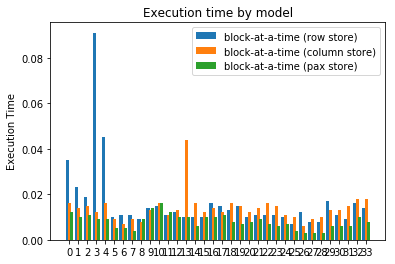

In [194]:
plot(micro[block], 34)

34 34
34 34
34 34


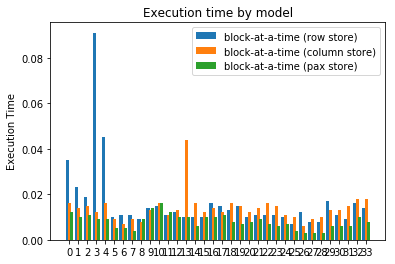

34 34
34 34
34 34


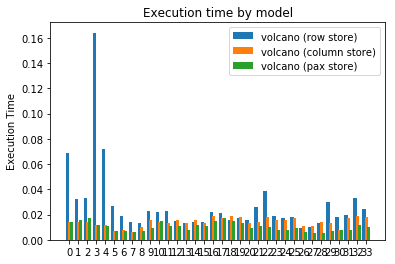

34 34
34 34
34 34


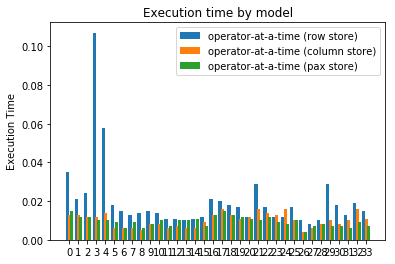

34 34
34 34
34 34


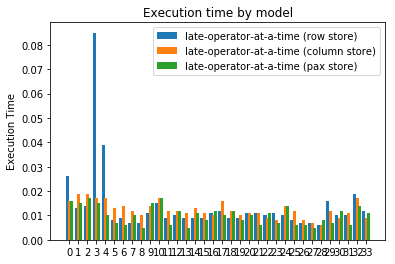

In [195]:
for model in models:
    plot(micro[model], 34)

10 10
10 10
10 10


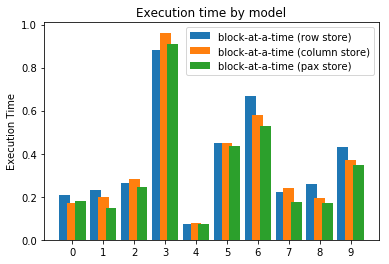

10 10
10 10
10 10


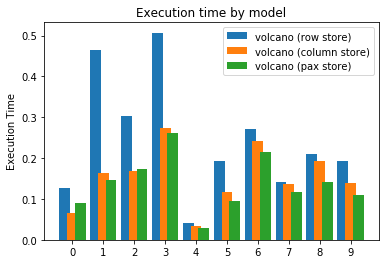

10 10
10 10
10 10


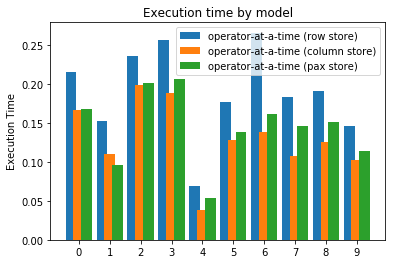

10 10
10 10
10 10


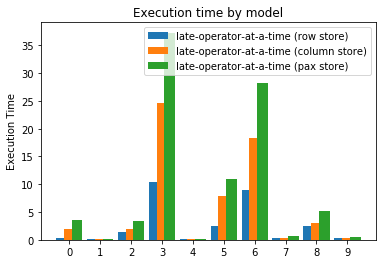

In [196]:
for model in models:
    plot(tcph[model], 10)